In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
df = sns.load_dataset('titanic')
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    str     
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    str     
 8   class        891 non-null    category
 9   who          891 non-null    str     
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    str     
 13  alive        891 non-null    str     
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), str(5)
memory usage: 80.7 KB


In [10]:
data = {
    "cgpa": [7.2, 8.5, 6.8, 9.1, 7.9,8.8,7.9,8.43,8.44,6.8],
    "internship": [1, 1, 2, 1, 3,1,2,2,3,1],
    "projects": [2, 3, 1, 4, 2,4,5,1,2,3],
    "placed": [1, 1, 0, 1, 0, 0, 1,0,1,0,0]
}
# df = pd.DataFrame(data)

In [27]:
data1 = {
    "cgpa": [7.2, 8.5, 6.8, 9.1, 7.9,np.nan,7.9,8.43,8.44,6.8],
    "internship": [1, 1, np.nan, 1, 3,1,2,2,3,1],
    "projects": [2, 3, 1, 4, 2,4,np.nan,1,2,3],
    "placed": [1, 1, 0, 1, 0, 0, 1,0,1,0]
}
df = pd.DataFrame(data1)
df

,cgpa,internship,projects,placed
0,7.20,1.0,2.0,1
1,8.50,1.0,3.0,1
2,6.80,NaN,1.0,0
3,9.10,1.0,4.0,1
4,7.90,3.0,2.0,0
5,NaN,1.0,4.0,0
6,7.90,2.0,NaN,1
7,8.43,2.0,1.0,0
8,8.44,3.0,2.0,1
9,6.80,1.0,3.0,0


In [28]:
df['cgpa'] = df['cgpa'].fillna(df['cgpa'].mean())
df['internship'] = df['internship'].fillna(df['internship'].mean())
df['projects'] = df['projects'].fillna(df['projects'].mean())
df

,cgpa,internship,projects,placed
0,7.200000,1.000000,2.000000,1
1,8.500000,1.000000,3.000000,1
2,6.800000,1.666667,1.000000,0
3,9.100000,1.000000,4.000000,1
4,7.900000,3.000000,2.000000,0
5,7.896667,1.000000,4.000000,0
6,7.900000,2.000000,2.444444,1
7,8.430000,2.000000,1.000000,0
8,8.440000,3.000000,2.000000,1
9,6.800000,1.000000,3.000000,0


In [40]:
data1 = {
    "cgpa": [7.2, 8.5, 6.8, 9.1, 7.9,np.nan,7.9,8.43,8.44,6.8],
    "internship": [1, 1, np.nan, 1, 3,1,2,2,3,1],
    "projects": [2, 3, 1, 4, 2,4,np.nan,1,2,3],
    "placed": [1, 1, 0, 1, 0, 0, 1,0,1,0]
}
df1 = pd.DataFrame(data1)
df1

,cgpa,internship,projects,placed
0,7.20,1.0,2.0,1
1,8.50,1.0,3.0,1
2,6.80,NaN,1.0,0
3,9.10,1.0,4.0,1
4,7.90,3.0,2.0,0
5,NaN,1.0,4.0,0
6,7.90,2.0,NaN,1
7,8.43,2.0,1.0,0
8,8.44,3.0,2.0,1
9,6.80,1.0,3.0,0


In [41]:
from sklearn.impute import SimpleImputer

In [42]:
imputer = SimpleImputer(strategy = 'mean')
df1 = imputer.fit_transform(df1)

In [43]:
print(df)
print()
print()
print(df1)

       cgpa  internship  projects  placed
0  7.200000    1.000000  2.000000       1
1  8.500000    1.000000  3.000000       1
2  6.800000    1.666667  1.000000       0
3  9.100000    1.000000  4.000000       1
4  7.900000    3.000000  2.000000       0
5  7.896667    1.000000  4.000000       0
6  7.900000    2.000000  2.444444       1
7  8.430000    2.000000  1.000000       0
8  8.440000    3.000000  2.000000       1
9  6.800000    1.000000  3.000000       0


[[7.2        1.         2.         1.        ]
 [8.5        1.         3.         1.        ]
 [6.8        1.66666667 1.         0.        ]
 [9.1        1.         4.         1.        ]
 [7.9        3.         2.         0.        ]
 [7.89666667 1.         4.         0.        ]
 [7.9        2.         2.44444444 1.        ]
 [8.43       2.         1.         0.        ]
 [8.44       3.         2.         1.        ]
 [6.8        1.         3.         0.        ]]


DETECTING DUPLICATES AND REMOVING THEM

In [44]:
data1 = {
    "cgpa": [7.2, 8.5, 6.8, 9.1, 7.9,np.nan,7.9,8.43,8.44,6.8,7.2],
    "internship": [1, 1, np.nan, 1, 3,1,2,2,3,1,1],
    "projects": [2, 3, 1, 4, 2,4,np.nan,1,2,3,2],
    "placed": [1, 1, 0, 1, 0, 0, 1,0,1,0,1]
}
df = pd.DataFrame(data1)
df

,cgpa,internship,projects,placed
0,7.20,1.0,2.0,1
1,8.50,1.0,3.0,1
2,6.80,NaN,1.0,0
3,9.10,1.0,4.0,1
4,7.90,3.0,2.0,0
5,NaN,1.0,4.0,0
6,7.90,2.0,NaN,1
7,8.43,2.0,1.0,0
8,8.44,3.0,2.0,1
9,6.80,1.0,3.0,0


In [49]:
df = df[(df.duplicated()==False)]
df

,cgpa,internship,projects,placed
0,7.20,1.0,2.0,1
1,8.50,1.0,3.0,1
2,6.80,NaN,1.0,0
3,9.10,1.0,4.0,1
4,7.90,3.0,2.0,0
5,NaN,1.0,4.0,0
6,7.90,2.0,NaN,1
7,8.43,2.0,1.0,0
8,8.44,3.0,2.0,1
9,6.80,1.0,3.0,0


In [50]:
df[df.duplicated()]

,cgpa,internship,projects,placed


DETECTING OUTLIERS

In [61]:
a = np.array([1, 2, 2, 3, 2, 4, 5, 30, 6, 9, 8, 1, 25])
a

array([ 1,  2,  2,  3,  2,  4,  5, 30,  6,  9,  8,  1, 25])

In [62]:
data_min = np.min(a)
q1 = np.percentile(a, 25)
median = np.median(a)
q3 = np.percentile(a, 75)
data_max = np.max(a)

In [63]:
print(data_min)
print(q1)
print(median)
print(q3)
print(data_max)

1
2.0
4.0
8.0
30


In [64]:
quartiles = np.percentile(a, [0, 25, 50, 75, 100])
print(quartiles)

[ 1.  2.  4.  8. 30.]


{'whiskers': [<matplotlib.lines.Line2D at 0x1929beb1bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1929beb1e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1929beb1a90>],
 'medians': [<matplotlib.lines.Line2D at 0x1929beb20d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1929beb2210>],
 'means': []}

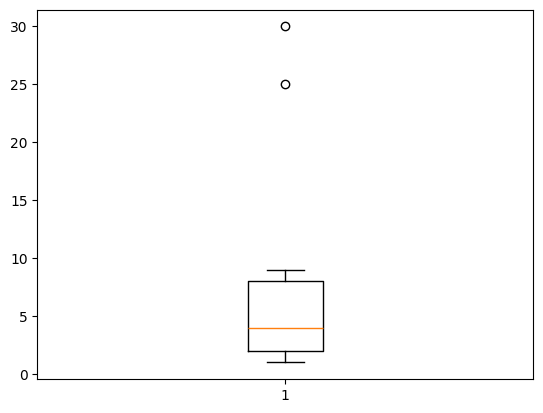

In [65]:
plt.boxplot(a)

In [66]:
q1 = np.percentile(a, 25)
q3 = np.percentile(a, 75)
iqr = q3 - q1
 
lower = q1 - (1.5 * iqr)
upper = q3 + (1.5 * iqr)
 
outliers = a[(a < lower) | (a > upper)]
print("Outliers:", outliers)

Outliers: [30 25]


Standardize numerical features using StandardScaler

In [67]:
a = np.array([1, 2, 2, 3, 2, 4, 5, 30, 6, 9, 8, 1, 25])
a

array([ 1,  2,  2,  3,  2,  4,  5, 30,  6,  9,  8,  1, 25])

In [76]:
a.shape

(13,)

In [79]:
a = a.reshape(13,1)
print(a.shape)

(13, 1)


In [80]:
scaler = StandardScaler()

In [81]:
scaler.fit_transform(a)

array([[-0.73412382],
       [-0.62184606],
       [-0.62184606],
       [-0.5095683 ],
       [-0.62184606],
       [-0.39729054],
       [-0.28501278],
       [ 2.52193125],
       [-0.17273502],
       [ 0.16409827],
       [ 0.05182051],
       [-0.73412382],
       [ 1.96054245]])

In [88]:
df = pd.DataFrame(a,columns=['data'])
df

,data
0,1
1,2
2,2
3,3
4,2
5,4
6,5
7,30
8,6
9,9


In [89]:
df.shape

(13, 1)

In [90]:
scaler = StandardScaler()

In [98]:
scaled = scaler.fit_transform(df)
print(scaled)
print(scaled.mean())


[[-0.73412382]
 [-0.62184606]
 [-0.62184606]
 [-0.5095683 ]
 [-0.62184606]
 [-0.39729054]
 [-0.28501278]
 [ 2.52193125]
 [-0.17273502]
 [ 0.16409827]
 [ 0.05182051]
 [-0.73412382]
 [ 1.96054245]]
0.0


BALANCING DATASET USING SMOTE

In [109]:
a = np.ones(99)
a = np.append(a,0)
a

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.])

In [115]:
df = pd.DataFrame(a,columns=['data'])
df

,data
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
95,1.0
96,1.0
97,1.0
98,1.0


In [118]:
print(df[df['data']==1].sum())
print(df[df['data']==0].sum())

data    99.0
dtype: float64
data    0.0
dtype: float64


In [121]:
from imblearn.over_sampling import SMOTE

In [124]:
df.shape

(100, 1)

In [122]:
sm = SMOTE(random_state = 2)

In [130]:
data = {
    "hours_studied": [1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0],
    "marks": [35, 40, 45, 55, 60, 65, 70, 78, 85, 90]
}

df = pd.DataFrame(data,columns = ['marks','hours_studied'])
df

,marks,hours_studied
0,35,1.5
1,40,2.0
2,45,2.5
3,55,3.0
4,60,3.5
5,65,4.0
6,70,4.5
7,78,5.0
8,85,5.5
9,90,6.0


In [131]:
df['marks per hour'] = df['marks'] / df['hours_studied']
df

,marks,hours_studied,marks per hour
0,35,1.5,23.333333
1,40,2.0,20.000000
2,45,2.5,18.000000
3,55,3.0,18.333333
4,60,3.5,17.142857
5,65,4.0,16.250000
6,70,4.5,15.555556
7,78,5.0,15.600000
8,85,5.5,15.454545
9,90,6.0,15.000000


One-Hot Encoding

In [141]:
data = np.array([])
for i in range(10):
    a = np.random.randint(0,3)
    if a==1:
        data = np.append(data,"yes")
    elif a==0:
        data = np.append(data,"no")
    else :
        data = np.append(data,"maybe")

In [193]:
print(data)

['no' 'no' 'yes' 'maybe' 'yes' 'yes' 'no' 'yes' 'maybe' 'maybe']


In [231]:
df = pd.DataFrame(data,columns=["Placed"])

In [232]:
placed_df = df.copy()

In [195]:
df

,Placed
0,no
1,no
2,yes
3,maybe
4,yes
5,yes
6,no
7,yes
8,maybe
9,maybe


In [159]:
ohe = OneHotEncoder()

In [ ]:
ohe = OneHotEncoder(sparse_output=False)
df_t = ohe.fit_transform(df[['Placed']])
print(df_t)
print(ohe.get_feature_names_out(["Placed"]))

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
['Placed_maybe' 'Placed_no' 'Placed_yes']
['Placed_maybe', 'Placed_no', 'Placed_yes']


In [196]:
df

,Placed
0,no
1,no
2,yes
3,maybe
4,yes
5,yes
6,no
7,yes
8,maybe
9,maybe


In [197]:
df2 = df
df2

,Placed
0,no
1,no
2,yes
3,maybe
4,yes
5,yes
6,no
7,yes
8,maybe
9,maybe


In [198]:
df2['Student'] = 1
df2

,Placed,Student
0,no,1
1,no,1
2,yes,1
3,maybe,1
4,yes,1
5,yes,1
6,no,1
7,yes,1
8,maybe,1
9,maybe,1


In [199]:
ohe = OneHotEncoder(sparse_output=False)
encoded = ohe.fit_transform(df2[['Placed']])


In [200]:
encoded

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [209]:
df[["Placed"]].shape

(10, 1)

In [210]:
encoded.shape

(10, 3)

In [216]:
# a = np.array([[1],[2],[3]])
# b = np.array([[4],[5],[6]])
# c = np.hstack([a,b])
# print(c)

In [217]:
df2_encoded = np.hstack([df2[["Placed"]].values, encoded,df[['Student']]])


In [218]:
df2_encoded

array([['no', 0.0, 1.0, 0.0, 1],
       ['no', 0.0, 1.0, 0.0, 1],
       ['yes', 0.0, 0.0, 1.0, 1],
       ['maybe', 1.0, 0.0, 0.0, 1],
       ['yes', 0.0, 0.0, 1.0, 1],
       ['yes', 0.0, 0.0, 1.0, 1],
       ['no', 0.0, 1.0, 0.0, 1],
       ['yes', 0.0, 0.0, 1.0, 1],
       ['maybe', 1.0, 0.0, 0.0, 1],
       ['maybe', 1.0, 0.0, 0.0, 1]], dtype=object)

In [223]:
newdf = pd.DataFrame(df2_encoded, columns=['Placed'] + list(ohe.get_feature_names_out(['Placed'])) + ['Student'])

In [224]:
newdf

,Placed,Placed_maybe,Placed_no,Placed_yes,Student
0,no,0.0,1.0,0.0,1
1,no,0.0,1.0,0.0,1
2,yes,0.0,0.0,1.0,1
3,maybe,1.0,0.0,0.0,1
4,yes,0.0,0.0,1.0,1
5,yes,0.0,0.0,1.0,1
6,no,0.0,1.0,0.0,1
7,yes,0.0,0.0,1.0,1
8,maybe,1.0,0.0,0.0,1
9,maybe,1.0,0.0,0.0,1


Using Label Encoding

In [228]:
placed_df

,Placed,Student
0,no,1
1,no,1
2,yes,1
3,maybe,1
4,yes,1
5,yes,1
6,no,1
7,yes,1
8,maybe,1
9,maybe,1


In [244]:
df = placed_df.copy()

In [245]:
df

,Placed
0,no
1,no
2,yes
3,maybe
4,yes
5,yes
6,no
7,yes
8,maybe
9,maybe


In [246]:
le = LabelEncoder()

In [251]:
encoded_values = le.fit_transform(df[['Placed']])

c:\Internship\AIML\MLEx\venv\Lib\site-packages\sklearn\preprocessing\_label.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [254]:
print(encoded_values.shape)
print(df[['Placed']].shape)

(10,)
(10, 1)


In [255]:
encoded_values = encoded_values.reshape(10,1)
print(encoded_values.shape)

(10, 1)


In [256]:
encoded_comb = np.hstack([df[['Placed']].values, encoded_values])

In [257]:
encoded_comb

array([['no', 1],
       ['no', 1],
       ['yes', 2],
       ['maybe', 0],
       ['yes', 2],
       ['yes', 2],
       ['no', 1],
       ['yes', 2],
       ['maybe', 0],
       ['maybe', 0]], dtype=object)

In [259]:
newdf = pd.DataFrame(encoded_comb, columns = ['Placed','Labels'])
newdf

,Placed,Labels
0,no,1
1,no,1
2,yes,2
3,maybe,0
4,yes,2
5,yes,2
6,no,1
7,yes,2
8,maybe,0
9,maybe,0


CORRELATION 

In [260]:
data = {
    'x': [45, 37, 42, 35, 39],
    'y': [38, 31, 26, 28, 33],
    'z': [10, 15, 17, 21, 12]
}
dataframe = pd.DataFrame(data, columns=['x', 'y', 'z'])
matrix = dataframe.corr()
print(matrix)

          x         y         z
x  1.000000  0.518457 -0.701886
y  0.518457  1.000000 -0.860941
z -0.701886 -0.860941  1.000000


In [301]:
set1 = set()
for i in range(len(matrix)):
        for j in range(len(matrix)):
            if i!=j and ((matrix.values[i][j]>0.7) or (matrix.values[i][j]<-0.7) and ((i,j) not in set1 and (j,i) not in set1) ):
                set1.add((i,j))

print(set1)


{(0, 2), (1, 2)}


In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
X = pd.DataFrame(iris['data'],columns=['sepal length in cm','sepal width in cm' ,'petal length in cm' , 'petal width in cm'])
X

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
y = iris['target']

In [5]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.25,random_state=10)

In [6]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier()

In [7]:
tree_classifier.fit(xtrain,ytrain)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [10]:
y_train_pred = tree_classifier.predict(xtrain)
y_test_pred = tree_classifier.predict(xtest)


In [11]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(ytrain, y_train_pred)
test_accuracy = accuracy_score(ytest, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.9736842105263158


In [14]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.94      1.00      0.97        15
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



Preprocessing, feature scaling, model training and evaluation

In [25]:
import pandas as pd

data = {
    "cgpa": [7.2, 8.5, 6.8, 9.1, 7.9, 8.2, 6.5, 8.9, 7.1, 9.0],
    "internships": [1, 2, 0, 3, 2, 1, 0, 3, 1, 2],
    "projects": [2, 4, 1, 5, 3, 2, 1, 4, 2, 5],
    "communication": [6, 8, 5, 9, 7, 7, 4, 8, 6, 9],
    "degree": ["CS", "CS", "EE", "CS", "ME", "EE", "ME", "CS", "EE", "CS"],
    "placed": [0, 1, 0, 1, 1, 1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)
df


,cgpa,internships,projects,communication,degree,placed
0,7.2,1,2,6,CS,0
1,8.5,2,4,8,CS,1
2,6.8,0,1,5,EE,0
3,9.1,3,5,9,CS,1
4,7.9,2,3,7,ME,1
5,8.2,1,2,7,EE,1
6,6.5,0,1,4,ME,0
7,8.9,3,4,8,CS,1
8,7.1,1,2,6,EE,0
9,9.0,2,5,9,CS,1


In [26]:
x = df.drop(columns=['placed'])
y = df['placed']

In [27]:
num_features = ["cgpa", "internships", "projects", "communication"]
cat_features = ["degree"]


In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(), cat_features)
])


In [29]:
X_transformed = preprocessor.fit_transform(x)

In [33]:
print(X_transformed)

[[-0.78577152 -0.48795004 -0.62254302 -0.57035183  1.          0.
   0.        ]
 [ 0.63298261  0.48795004  0.76088591  0.69709668  1.          0.
   0.        ]
 [-1.22231125 -1.46385011 -1.31425748 -1.20407608  0.          1.
   0.        ]
 [ 1.28779221  1.46385011  1.45260037  1.33082093  1.          0.
   0.        ]
 [-0.02182699  0.48795004  0.06917145  0.06337243  0.          0.
   1.        ]
 [ 0.30557781 -0.48795004 -0.62254302  0.06337243  0.          1.
   0.        ]
 [-1.54971604 -1.46385011 -1.31425748 -1.83780033  0.          0.
   1.        ]
 [ 1.06952234  1.46385011  0.76088591  0.69709668  1.          0.
   0.        ]
 [-0.89490645 -0.48795004 -0.62254302 -0.57035183  0.          1.
   0.        ]
 [ 1.17865727  0.48795004  1.45260037  1.33082093  1.          0.
   0.        ]]


In [32]:
preprocessor.get_feature_names_out()

array(['num__cgpa', 'num__internships', 'num__projects',
       'num__communication', 'cat__degree_CS', 'cat__degree_EE',
       'cat__degree_ME'], dtype=object)

In [31]:
import pandas as pd

X_transformed_df = pd.DataFrame(
    X_transformed,
    columns=preprocessor.get_feature_names_out()
)

X_transformed_df


,num__cgpa,num__internships,num__projects,num__communication,cat__degree_CS,cat__degree_EE,cat__degree_ME
0,-0.785772,-0.48795,-0.622543,-0.570352,1.0,0.0,0.0
1,0.632983,0.48795,0.760886,0.697097,1.0,0.0,0.0
2,-1.222311,-1.46385,-1.314257,-1.204076,0.0,1.0,0.0
3,1.287792,1.46385,1.452600,1.330821,1.0,0.0,0.0
4,-0.021827,0.48795,0.069171,0.063372,0.0,0.0,1.0
5,0.305578,-0.48795,-0.622543,0.063372,0.0,1.0,0.0
6,-1.549716,-1.46385,-1.314257,-1.837800,0.0,0.0,1.0
7,1.069522,1.46385,0.760886,0.697097,1.0,0.0,0.0
8,-0.894906,-0.48795,-0.622543,-0.570352,0.0,1.0,0.0
9,1.178657,0.48795,1.452600,1.330821,1.0,0.0,0.0


In [35]:
xtrain,xtest,ytrain,ytest = train_test_split(X_transformed_df,y,test_size=0.3)

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [38]:
ypred = lr.predict(xtest)

In [40]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

